LinearRegression

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


   Year  Global_Sales
0  2012        120000
1  2013        200000
2  2014        320000
3  2015        550000
4  2016        770000
Year            0
Global_Sales    0
dtype: int64


C:\Users\prash\AppData\Local\Temp\ipykernel_5720\2978384057.py:16: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.

C:\Users\prash\AppData\Local\Temp\ipykernel_5720\2978384057.py:30: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



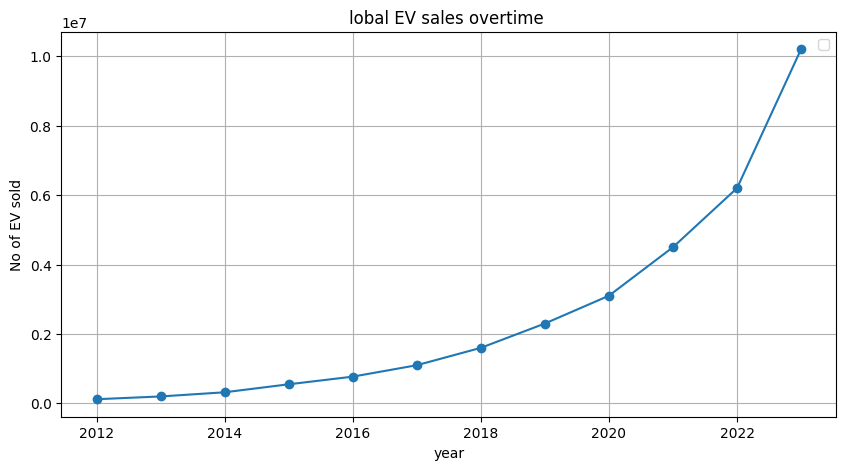

Mean Squared Error: 18250072623456.69
Mean Absolute Error: 3715888.8888888755
R2 Score: -2.1967818920029236


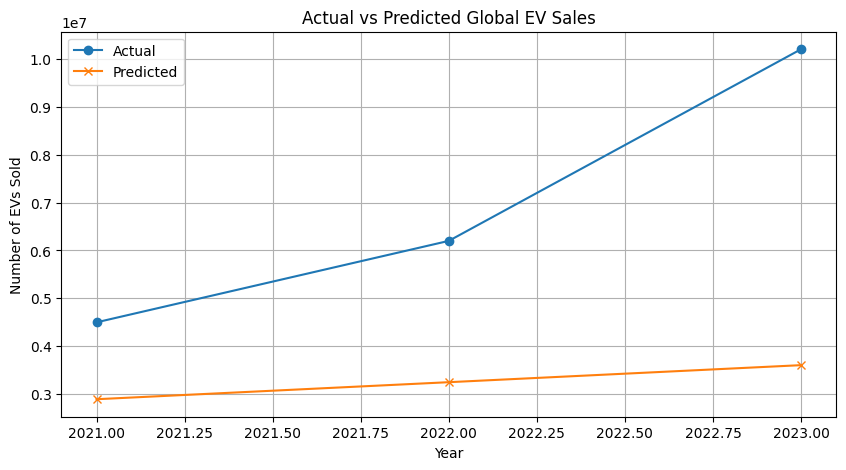


Predicted Global EV Sales for the Next 5 Years:

2024: 3,961,778 EVs
2025: 4,317,278 EVs
2026: 4,672,778 EVs
2027: 5,028,278 EVs
2028: 5,383,778 EVs


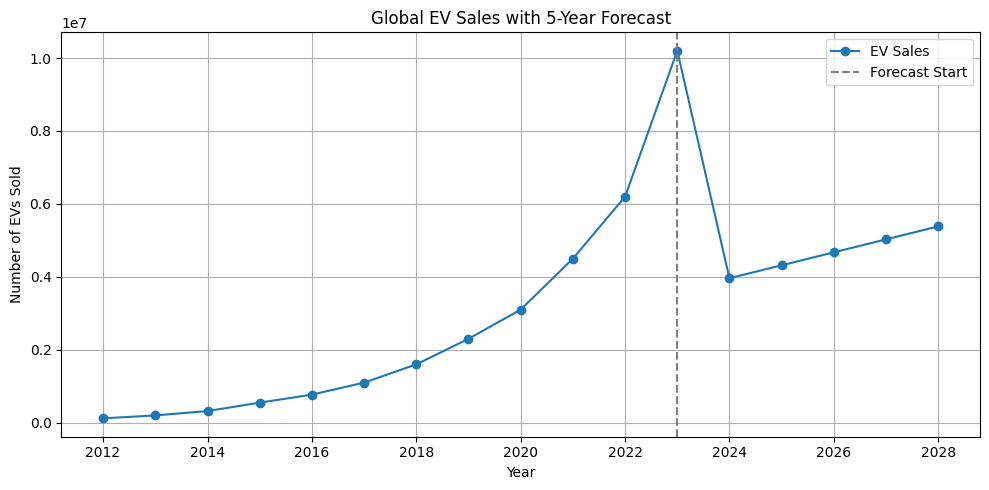

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

#load dataset
ev_sales_df=pd.read_csv("IEA_Global_EV_Data_2024.csv")

print(ev_sales_df.head())
print(ev_sales_df.isnull().sum())
ev_sales_df.fillna(method='ffill',inplace=True)

#converting year column to get time
ev_sales_df['Year']=pd.to_datetime(ev_sales_df['Year'],format='%Y')

#Set year as the index
ev_sales_df.set_index('Year',inplace=True)

#Visualization
plt.figure(figsize=(10, 5))
plt.plot(ev_sales_df,marker='o')
plt.title("lobal EV sales overtime ")
plt.xlabel("year")
plt.ylabel("No of EV sold")
plt.legend()
plt.grid(True)
plt.show()

fig=px.line(ev_sales_df,x=ev_sales_df.index,y='Global_Sales',title='Global Sales over time')
fig.show()

#prepare data for modeling
ev_sales_df['Year_Num'] = ev_sales_df.index.year
X = ev_sales_df[['Year_Num']]
y = ev_sales_df['Global_Sales']

#train test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42, shuffle=False)

#train the model
model = LinearRegression()
model.fit(X_train, y_train)

#predict on the test set
y_pred = model.predict(X_test)

#evluate the model
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

#plot actual vs predicted value
plt.figure(figsize=(10, 5))
plt.plot(X_test['Year_Num'], y_test, marker='o', label='Actual')
plt.plot(X_test['Year_Num'], y_pred, marker='x', label='Predicted')
plt.title("Actual vs Predicted Global EV Sales")
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.legend()
plt.grid(True)
plt.show()

#predict the future sales for next 5 years
last_year = ev_sales_df['Year_Num'].max()
future_years = pd.DataFrame({'Year_Num': np.arange(last_year + 1, last_year + 6)})
future_predictions = model.predict(future_years)

print("\nPredicted Global EV Sales for the Next 5 Years:\n")
for year, sales in zip(future_years['Year_Num'], future_predictions):
    print(f"{year}: {sales:,.0f} EVs")

#Create DataFrame for future predictions
future_df = pd.DataFrame({
    'Year_Num': future_years['Year_Num'],
    'Global_Sales': future_predictions
})
future_df['Year'] = pd.to_datetime(future_df['Year_Num'], format='%Y')
future_df.set_index('Year', inplace=True)

#combine the future predictions with existing predictions
combined_df = pd.concat([ev_sales_df[['Global_Sales']], future_df[['Global_Sales']]])

#plot future predictions
plt.figure(figsize=(10, 5))
plt.plot(combined_df.index, combined_df['Global_Sales'], marker='o', label='EV Sales')
plt.axvline(x=ev_sales_df.index.max(), color='gray', linestyle='--', label='Forecast Start')
plt.title("Global EV Sales with 5-Year Forecast")
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.legend()
plt.grid(True)
plt.show()

As the evluation matrices or we can say the output given by the LinearRegression is in range of R2 about -2 which is very poor (the range should be from 0-1). This means that the prediction given is less accurate than a guess. So i tried some other model training method like Polynomial Regression and ARIMA (AutoRegressive Integrated Moving Average)

Polynomial Regression

Polynomial Regression is a type of regression analysis where the relationship between the independent variable x and the dependent variable y is modeled as an nth degree polynomial.

It’s useful when the data shows a nonlinear relationship that can’t be captured well by simple linear regression

C:\Users\prash\AppData\Local\Temp\ipykernel_12820\2802359791.py:16: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



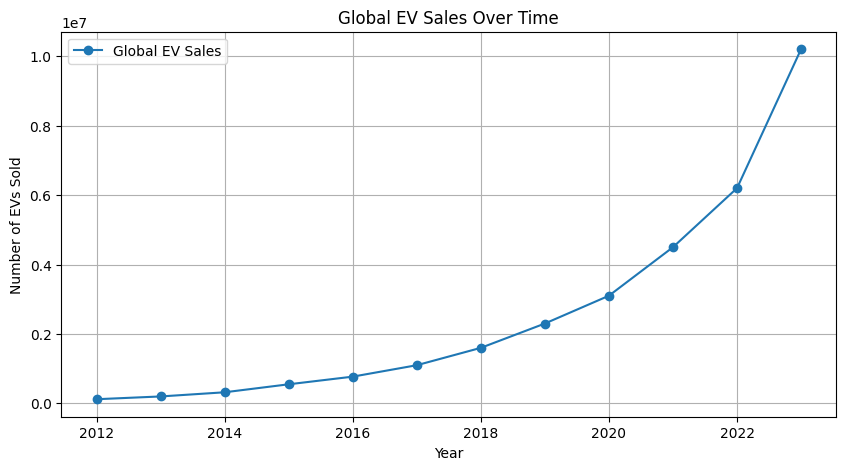


--- Polynomial Regression Metrics ---
Mean Squared Error: 3556932102191.256
Mean Absolute Error: 1411362.46875
R2 Score: 0.3769484445363702


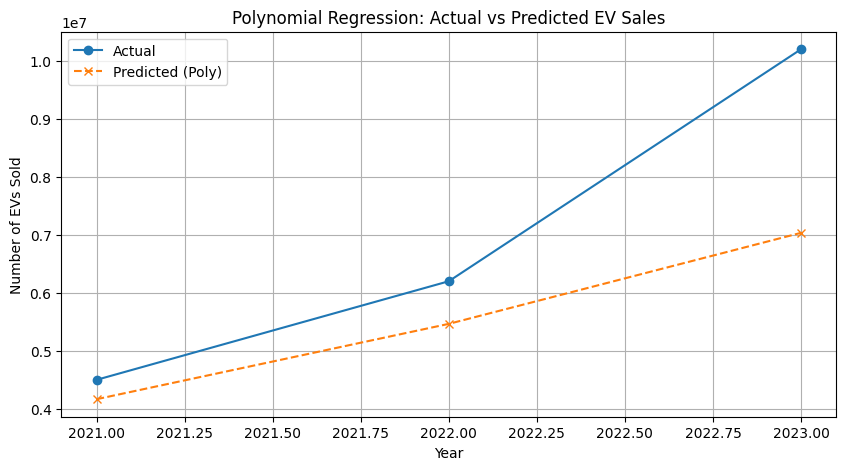


Predicted Global EV Sales for the Next 5 Years (Polynomial Regression):

2024: 8,901,937 EVs
2025: 11,094,432 EVs
2026: 13,639,591 EVs
2027: 16,564,851 EVs
2028: 19,897,650 EVs


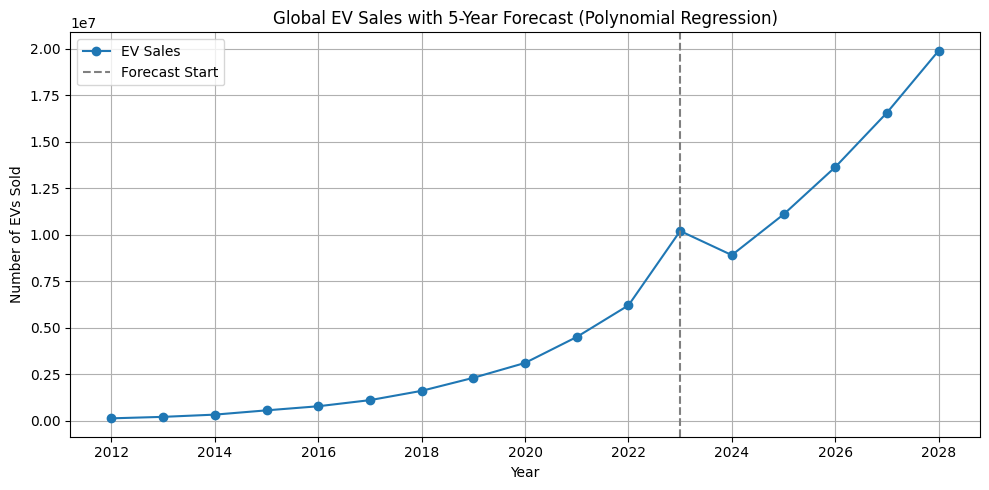

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
ev_sales_df = pd.read_csv("IEA_Global_EV_Data_2024.csv")

# Preprocessing
ev_sales_df.fillna(method='ffill', inplace=True)
ev_sales_df['Year'] = pd.to_datetime(ev_sales_df['Year'], format='%Y')
ev_sales_df.set_index('Year', inplace=True)

# Visualization
plt.figure(figsize=(10, 5))
plt.plot(ev_sales_df.index, ev_sales_df['Global_Sales'], marker='o', label='Global EV Sales')
plt.title("Global EV Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.legend()
plt.grid(True)
plt.show()

# Interactive Plotly line chart
fig = px.line(ev_sales_df, x=ev_sales_df.index, y='Global_Sales', title='Global Sales Over Time')
fig.show()

# Prepare data
ev_sales_df['Year_Num'] = ev_sales_df.index.year
X = ev_sales_df[['Year_Num']]
y = ev_sales_df['Global_Sales']

# Polynomial Features (degree=3)
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


# Train model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

# Predict and evaluate
y_pred_poly = poly_model.predict(X_test_poly)
print("\n--- Polynomial Regression Metrics ---")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_poly))
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_poly))
print("R2 Score:", r2_score(y_test, y_pred_poly))

# Plot Actual vs Predicted
plt.figure(figsize=(10, 5))
plt.plot(X_test['Year_Num'], y_test, marker='o', label='Actual')  # X_test[:, 1] = Year_Num
plt.plot(X_test['Year_Num'], y_pred_poly, marker='x', linestyle='--', label='Predicted (Poly)')
plt.title("Polynomial Regression: Actual vs Predicted EV Sales")
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.legend()
plt.grid(True)
plt.show()

# Future prediction (next 5 years)
last_year = ev_sales_df['Year_Num'].max()
future_years = pd.DataFrame({'Year_Num': np.arange(last_year + 1, last_year + 6)})
future_years_poly = poly.transform(future_years)
future_predictions = poly_model.predict(future_years_poly)

print("\nPredicted Global EV Sales for the Next 5 Years (Polynomial Regression):\n")
for year, sales in zip(future_years['Year_Num'], future_predictions):
    print(f"{year}: {sales:,.0f} EVs")

# Create DataFrame for future predictions
future_df = pd.DataFrame({
    'Year_Num': future_years['Year_Num'],
    'Global_Sales': future_predictions
})
future_df['Year'] = pd.to_datetime(future_df['Year_Num'], format='%Y')
future_df.set_index('Year', inplace=True)

# Combine existing + future
combined_df = pd.concat([ev_sales_df[['Global_Sales']], future_df[['Global_Sales']]])

# Plot forecast
plt.figure(figsize=(10, 5))
plt.plot(combined_df.index, combined_df['Global_Sales'], marker='o', label='EV Sales')
plt.axvline(x=ev_sales_df.index.max(), color='gray', linestyle='--', label='Forecast Start')
plt.title("Global EV Sales with 5-Year Forecast (Polynomial Regression)")
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The R2 score increased to 0.37(Polynomial Regression) fromm -2(LinearRegression).

ARIMA (AutoRegressive Integrated Moving Average)

ARIMA is a model used to analyze and forecast time series data — data points collected or recorded at regular time intervals

AutoRegressive (AR):  
The model uses the relationship between an observation and a number of lagged observations (previous time points).

Integrated (I):  
Differencing the data (subtracting an observation from a previous observation) to make the time series stationary (constant mean and variance).

Moving Average (MA):  
The model uses the relationship between an observation and a residual error from a moving average model applied to lagged observations

In [6]:
pip install statsmodels

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.8 MB 411.6 kB/s eta 0:00:23
   -- ------------------------------------- 0.5/9.8 MB 411.6 kB/s eta 0:00:23
   --- ------------------------------------ 0.8/9.8 MB 459.2 kB/s eta 0:00:20
   ---- ----------------------------------- 1.0/9.8 MB 609.5 kB/s eta 0:00:15
   ----- ---------------------------------- 1.3/9.8 MB 693.3 kB/s eta 0:00:13
   ------ --------------------------------- 1.6/9.8 MB 779.7 kB/s eta 0:00:11
   ------- -------------------------------- 1.8/9.8 MB 847.2 kB/s eta 0:00:10
   -------- ----------------------------

C:\Users\prash\AppData\Local\Temp\ipykernel_12820\4009436073.py:13: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



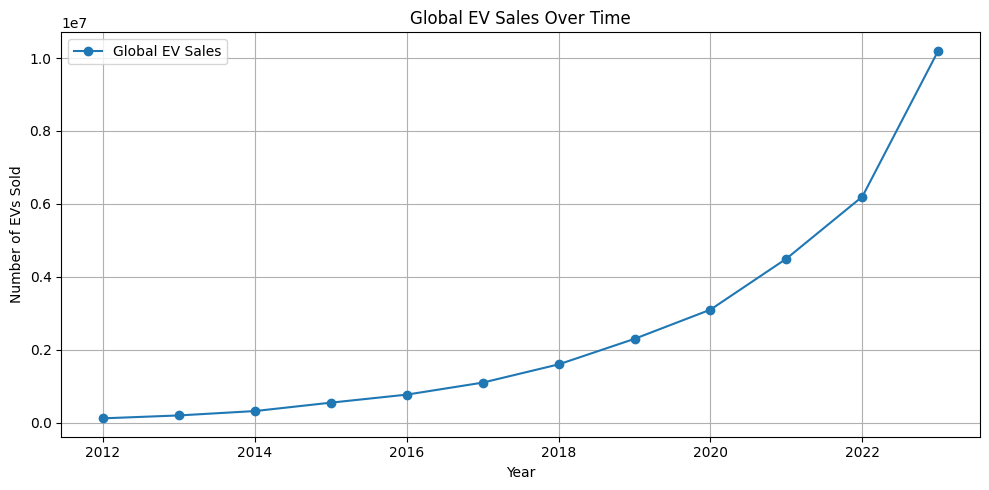

ADF Statistic: -0.971408234518024
p-value: 0.7635491528992278
The series is likely non-stationary. Differencing required.


c:\Users\prash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

c:\Users\prash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

c:\Users\prash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

c:\Users\prash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

c:\Users\prash\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood op

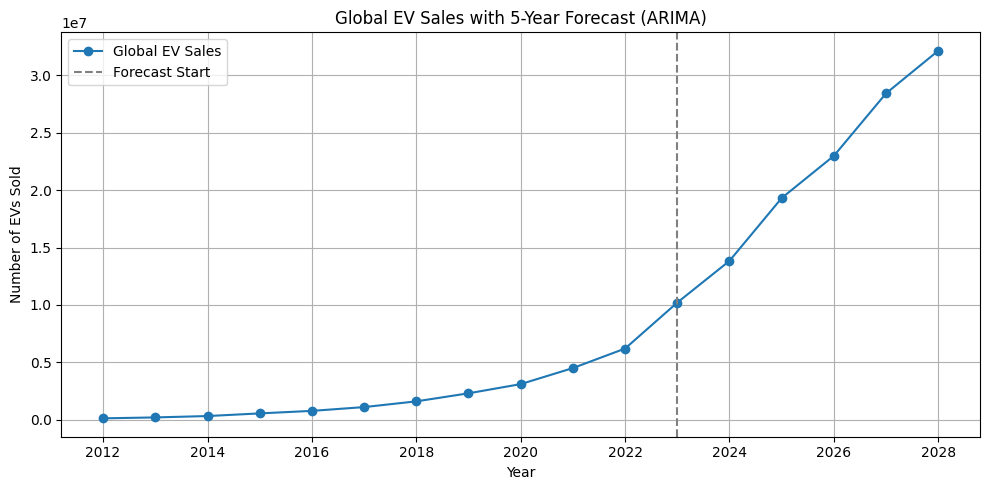


--- Evaluation on last 5 years ---
MSE: 738408368349.4663
MAE: 575883.7921058462
R2 Score: 0.9060357873931759


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load and preprocess data
ev_sales_df = pd.read_csv("IEA_Global_EV_Data_2024.csv")
ev_sales_df.fillna(method='ffill', inplace=True)
ev_sales_df['Year'] = pd.to_datetime(ev_sales_df['Year'], format='%Y')
ev_sales_df.set_index('Year', inplace=True)

# Plot original data
plt.figure(figsize=(10, 5))
plt.plot(ev_sales_df.index, ev_sales_df['Global_Sales'], marker='o', label='Global EV Sales')
plt.title("Global EV Sales Over Time")
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Check stationarity using Augmented Dickey-Fuller test
result = adfuller(ev_sales_df['Global_Sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] > 0.05:
    print("The series is likely non-stationary. Differencing required.")
else:
    print("The series is likely stationary. ARIMA can be applied directly.")

# Differencing if needed
if result[1] > 0.05:
    ev_sales_df['Differenced'] = ev_sales_df['Global_Sales'].diff().dropna()
    series = ev_sales_df['Differenced'].dropna()
    d = 1
else:
    series = ev_sales_df['Global_Sales']
    d = 0

# Fit ARIMA model
model = ARIMA(ev_sales_df['Global_Sales'], order=(2, d, 2))  # ARIMA(p,d,q)
arima_result = model.fit()

# Forecast next 5 years
future_steps = 5
forecast = arima_result.forecast(steps=future_steps)

# Display forecast
last_year = ev_sales_df.index.year.max()
forecast_years = pd.date_range(start=f"{last_year+1}", periods=future_steps, freq='YS')
forecast_df = pd.DataFrame({'Global_Sales': forecast.values}, index=forecast_years)

# Combine and plot
combined_df = pd.concat([ev_sales_df[['Global_Sales']], forecast_df])
plt.figure(figsize=(10, 5))
plt.plot(combined_df.index, combined_df['Global_Sales'], marker='o', label='Global EV Sales')
plt.axvline(x=ev_sales_df.index.max(), color='gray', linestyle='--', label='Forecast Start')
plt.title("Global EV Sales with 5-Year Forecast (ARIMA)")
plt.xlabel("Year")
plt.ylabel("Number of EVs Sold")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Evaluation on last few points (if desired)
preds = arima_result.predict(start=len(ev_sales_df)-5, end=len(ev_sales_df)-1)
actuals = ev_sales_df['Global_Sales'][-5:]
print("\n--- Evaluation on last 5 years ---")
print("MSE:", mean_squared_error(actuals, preds))
print("MAE:", mean_absolute_error(actuals, preds))
print("R2 Score:", r2_score(actuals, preds))


The value is increased upto 0.90 in ARIMA which is far better than LinearRegression and PolynomialRegression .